In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_=pd.read_csv("../input/diagnose/new_dataset.csv")

In [3]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 133 entries, Disease to prognosis
dtypes: int64(132), object(1)
memory usage: 316.0+ KB


In [4]:
data_.columns

Index(['Disease', 'itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [5]:
data_.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,Fungalinfection,1,3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungalinfection,0,3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungalinfection,1,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungalinfection,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungalinfection,1,3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


HepatitisD                             10
Dengue                                 10
Chickenpox                             10
Migraine                               10
HepatitisB                              9
Hypoglycemia                            9
CommonCold                              9
Tuberculosis                            9
HepatitisE                              9
hepatitisA                              9
Typhoid                                 9
Hyperthyroidism                         9
Jaundice                                9
Diabetes                                9
Pneumonia                               9
Varicoseveins                           8
Malaria                                 8
Hypothyroidism                          8
Alcoholichepatitis                      8
Chroniccholestasis                      8
Osteoarthristis                         7
BronchialAsthma                         7
(vertigo)ParoymsalPositionalVertigo     7
HepatitisC                        

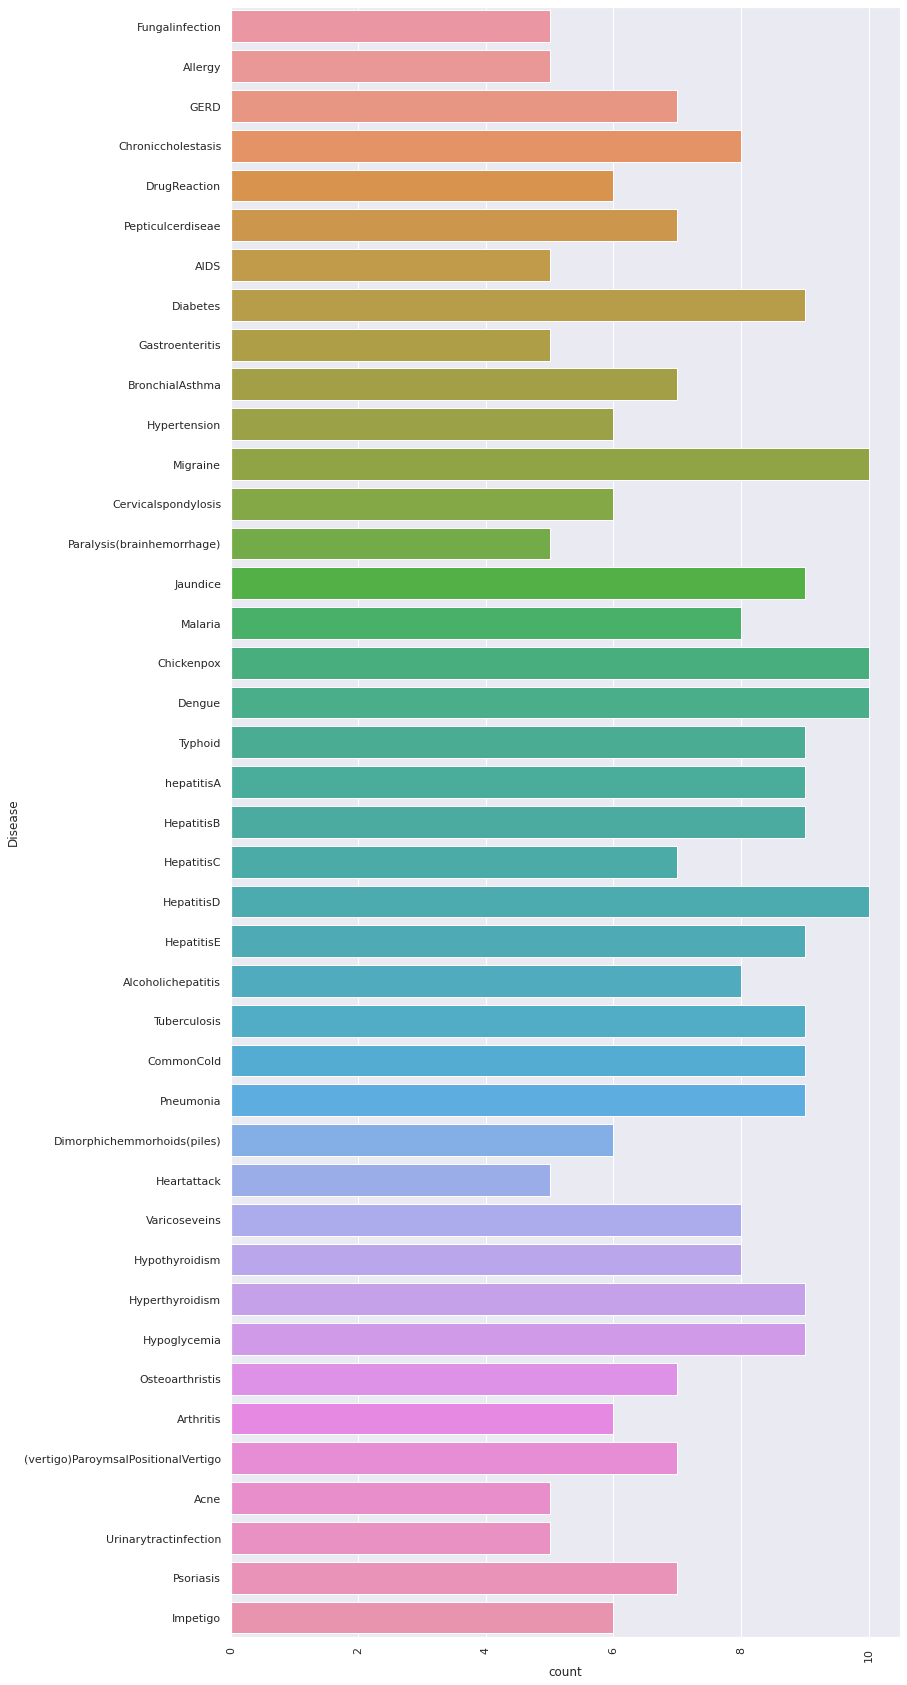

In [6]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,30))
plt.xticks(rotation = 90)
sns.countplot(y="Disease", data=data_)
print(data_["Disease"].value_counts())

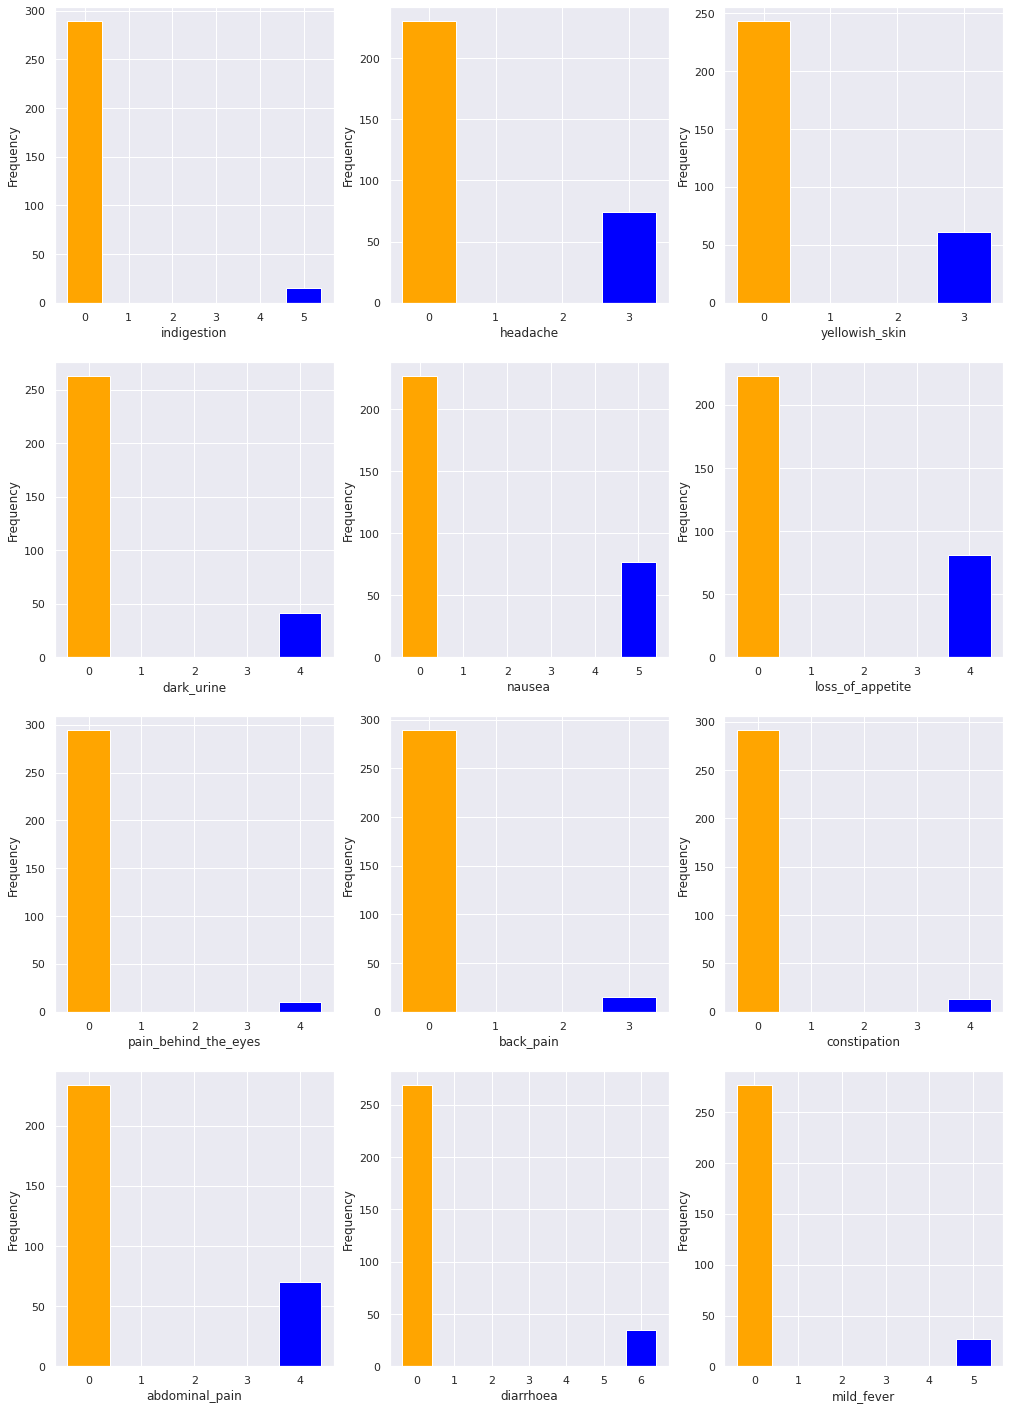

In [7]:
# lets visualize some of features
features = ['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever']
c = ['orange', 'blue']


plt.figure(figsize = (17,25))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    plt.bar(data_[feature].value_counts().index.to_numpy(), data_[feature].value_counts().values,color = c)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.show()

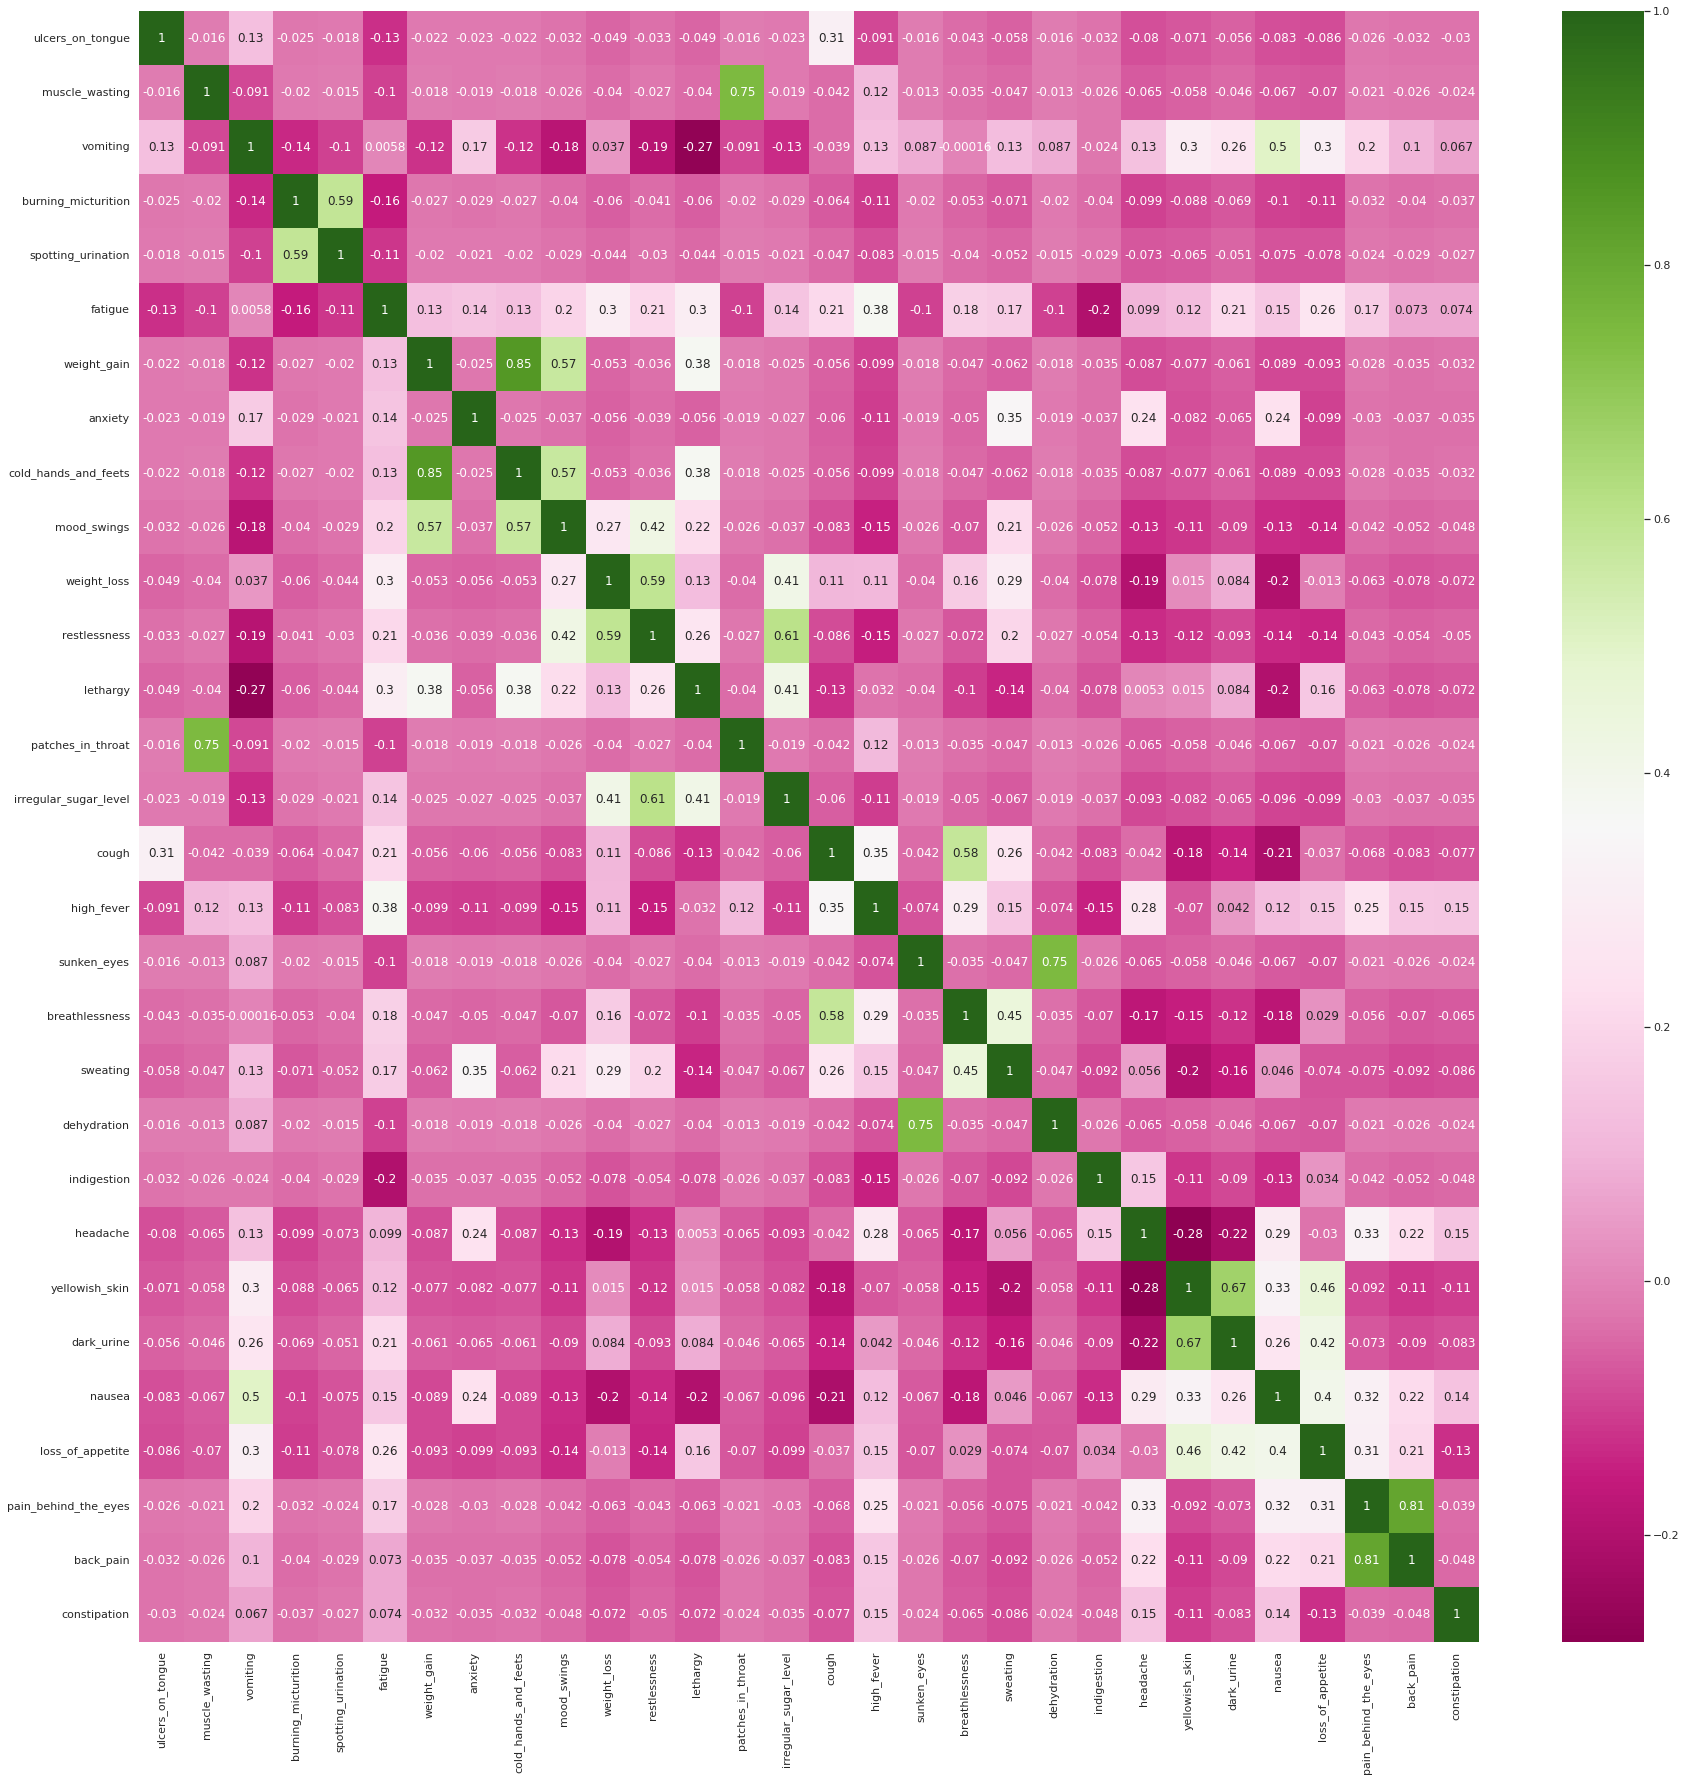

In [8]:
# linear relationships between some of features using correlation heatmap: for example which symptoms occur together?
df_corr = data_.iloc[:, 10:40]
plt.figure(figsize = (30, 30))
sns.heatmap(df_corr.corr(), annot = True,cmap="PiYG")
plt.show()

In [9]:
# plot the validation curve
from sklearn.model_selection import validation_curve
def plot_cv_indices(clf, X, y,param_name,parameter_range,  cv=10,model_name ="SVM"):
 
  train_score, test_score = validation_curve(clf, X, y,
                                       param_name = param_name,
                                       param_range = parameter_range,
                                        cv = cv, scoring = "accuracy",n_jobs=2)
 
# Calculating mean and standard deviation of training score
  mean_train_score = np.mean(train_score, axis = 1)
  std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
  mean_test_score = np.mean(test_score, axis = 1)
  std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
  plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
  plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
  plt.title(f"Validation Curve with {model_name} Classifier")
  plt.xlabel(f"Value of {param_name}")
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.show()

 # **MODELS**

KNN

In [10]:
# KNN_Model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)  # k = 5
y=data_['Disease']
X=data_.iloc[:,1:]


In [11]:
y.head()

0    Fungalinfection
1    Fungalinfection
2    Fungalinfection
3    Fungalinfection
4    Fungalinfection
Name: Disease, dtype: object

In [12]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [14]:

knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
param_range = np.arange(1, 11, 1)
plot_cv_indices(knn, X_train, y_train ,"n_neighbors", param_range ,  cv=10 ,model_name = "KNN")
print("Prediction list: {}".format(prediction[0:20]))
print("With KNN (K=5) accuracy is: ",knn.score(X_test, y_test))

ValueError: n_splits=10 cannot be greater than the number of members in each class.

In [ ]:
knn.classes_

Model Complexity


In [ ]:
neighbors = np.arange(1,25)   # for k tuning
train_accuracy = []
test_accuracy = []
# Loop for different k values
for i, k in enumerate(neighbors):
    # k from 1 to 25 (excluded)
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit the knn
    knn.fit(X_train, y_train)
    # train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

In [ ]:
# Plot the accuracies
plt.figure(figsize = (13,8))
plt.plot(neighbors, train_accuracy, label = "Training accuracy")
plt.plot(neighbors, test_accuracy, label = "Testing accuracy")
plt.legend()
plt.title("Accuracy for both train and test data")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.show()

Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
k = 5 # for K-fold cross validation
cv_result = cross_val_score(knn, X_train, y_train, cv = k) # uses R^2 score
print("CV scores: ", cv_result)
print("CV scores average: ", np.sum(cv_result)/len(cv_result))

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
dt.predict(X_test)
dt.score(X_test, y_test)
param_range = np.arange(1,11, 1)
plot_cv_indices(dt, X_train,  y_train ,"max_depth", param_range ,  cv=10 ,model_name = "Decision Tree")


# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42, n_estimators = 100)
rfc.fit(X_train, y_train)
rfc.predict(X_test)
rfc.score(X_test, y_test)


 

#  SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma = "auto", kernel = "rbf" )
svc.fit(X_train, y_train)
svc.predict(X_test)
svc.score(X_test, y_test)



param_range = np.arange(1, 250, 25)

plot_cv_indices(svc, X_train, y_train,"C", param_range , cv=10 ,model_name = "SVM")


# Metrics


In [ ]:
y_predictions = {"KNN": knn.predict(X_test),
          "SVC": svc.predict(X_test),
          "DT": dt.predict(X_test),
          "RFC": rfc.predict(X_test)}

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

for classifier, y_pred in y_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    print(classifier,'Confusion matrix: \n',cm)
    print("------------------")
    print(classifier, 'Classification report: \n',classification_report(y_test,y_pred))

In [ ]:
models = ["KNN-MODEL","Decision Tree Classifier","SVM","RandomForest"]
accuracies = [0.9836065573770492,0.7049180327868853, 0.9836065573770492,1.0 ]

x = models
y = accuracies

fig, ax = plt.subplots()    
width = 0.75

ind = np.arange(len(y))  
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Models scores')
plt.xlabel('Models Accuracies')
plt.ylabel('Models')